In [1]:
#Taking in all imports required for task 1

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB, CategoricalNB
from sklearn.decomposition import PCA
import prince
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import cross_val_score
import shap
shap.initjs()

In [2]:
#Understanding the different fields present in the data 

student_data = pd.read_csv("Dataset.csv")
student_data

,school,sex,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,Dalc,health,absences,G1,G2,G3,Feature_1,Feature_2,Feature_3,romantic
0,GP,F,U,GT3,A,4,4.0,at_home,teacher,course,...,1,3,4.0,0,11.0,11,18.0,2.0,1.0,no
1,GP,F,U,GT3,T,1,1.0,at_home,other,course,...,1,3,2.0,9,11.0,11,17.0,2.0,1.0,no
2,GP,F,U,LE3,T,1,1.0,at_home,other,other,...,2,3,6.0,12,13.0,12,15.0,NaN,3.0,no
3,GP,F,U,GT3,T,4,2.0,health,services,home,...,1,5,0.0,14,14.0,14,15.0,3.0,1.0,yes
4,GP,F,U,GT3,T,3,3.0,other,other,home,...,1,5,0.0,11,13.0,13,16.0,NaN,2.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,R,GT3,T,2,3.0,services,other,course,...,1,5,4.0,10,11.0,10,19.0,3.0,2.0,no
645,MS,F,U,LE3,T,3,1.0,teacher,services,course,...,1,1,NaN,15,15.0,16,18.0,2.0,1.0,no
646,MS,F,U,GT3,T,1,1.0,other,other,course,...,1,5,6.0,11,12.0,9,18.0,NaN,1.0,no
647,MS,M,U,LE3,T,3,1.0,services,services,course,...,3,2,6.0,10,10.0,10,NaN,1.0,4.0,no


In [3]:
student_data.isnull().sum()

school         0
sex            0
address        0
famsize       50
Pstatus        0
Medu           0
Fedu          73
Mjob           0
Fjob           0
reason         0
guardian       0
traveltime    73
failures       0
schoolsup      0
famsup         0
paid           0
activities     0
nursery        0
higher        76
internet       0
famrel         0
freetime      45
goout          0
Dalc           0
health         0
absences      69
G1             0
G2            35
G3             0
Feature_1     38
Feature_2     46
Feature_3     39
romantic       0
dtype: int64

In [4]:
student_data.dtypes

school         object
sex            object
address        object
famsize        object
Pstatus        object
Medu            int64
Fedu          float64
Mjob           object
Fjob           object
reason         object
guardian       object
traveltime    float64
failures        int64
schoolsup      object
famsup         object
paid           object
activities     object
nursery        object
higher         object
internet       object
famrel          int64
freetime      float64
goout           int64
Dalc            int64
health          int64
absences      float64
G1              int64
G2            float64
G3              int64
Feature_1     float64
Feature_2     float64
Feature_3     float64
romantic       object
dtype: object

# <u> LEVEL 2 </u> :- (note that i have cleaned data before using hence level 2 before level 1

### <u> **Data preprocessing** </u> : 
- Except our unknown features i.e Feature_1, Feature_2,Feature_3 I have filled null values with respective medians.
- I dropped the field "G2" because it is dependent on G1 and G3 by G2 = (2*G3-G1) or weighted accrodingly by credits of different semesters which dont put much impact.

- Then i dropped the corresponding rows wherever either of Feature_1 , Feature_2 , Feature_3 had a null value. 

- The dataset size is now reduced to 533 rows.

In [5]:
student_data.fillna({"Fedu" : student_data["Fedu"].median() , "higher" : "yes","famsize" : "GT3" , "traveltime" : student_data["traveltime"].median() , "freetime" : student_data["freetime"].median(), "absences" : student_data["absences"].median()},inplace = True)
student_data.drop(["G2"],axis=1,inplace = True)
student_data.dropna(axis = 0,inplace = True)
student_data

,school,sex,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,goout,Dalc,health,absences,G1,G3,Feature_1,Feature_2,Feature_3,romantic
0,GP,F,U,GT3,A,4,4.0,at_home,teacher,course,...,4,1,3,4.0,0,11,18.0,2.0,1.0,no
1,GP,F,U,GT3,T,1,1.0,at_home,other,course,...,3,1,3,2.0,9,11,17.0,2.0,1.0,no
3,GP,F,U,GT3,T,4,2.0,health,services,home,...,2,1,5,0.0,14,14,15.0,3.0,1.0,yes
6,GP,M,U,GT3,T,2,2.0,other,other,home,...,4,1,3,0.0,13,13,16.0,2.0,1.0,no
7,GP,F,U,GT3,A,4,4.0,other,teacher,home,...,4,1,1,2.0,10,13,17.0,2.0,1.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640,MS,M,R,GT3,T,4,2.0,other,other,home,...,3,4,3,2.0,7,0,18.0,1.0,3.0,no
642,MS,F,U,GT3,T,4,3.0,teacher,other,other,...,4,1,1,0.0,6,11,17.0,2.0,1.0,no
644,MS,F,R,GT3,T,2,3.0,services,other,course,...,2,1,5,4.0,10,10,19.0,3.0,2.0,no
645,MS,F,U,LE3,T,3,1.0,teacher,services,course,...,4,1,1,2.0,15,16,18.0,2.0,1.0,no


In [6]:

# Since we have categorical fields, (almost every field is categorical) we want to encode this into numbers which represent categories
# So, I created a new column for every categorical field labelled with origcol + "_code". The corresponding map is stored in the
# dictionary category_mappings for us to refer which number refers to which category

category_mappings = {}
for orig_col in student_data.columns:
    if student_data[orig_col].dtype == "object":
        student_data[orig_col] = student_data[orig_col].astype("category")
        student_data[orig_col+"_code"] = student_data[orig_col].astype("category").cat.codes
        category_mappings[orig_col] = dict(enumerate(student_data[orig_col].cat.categories))
category_mappings

{'school': {0: 'GP', 1: 'MS'},
 'sex': {0: 'F', 1: 'M'},
 'address': {0: 'R', 1: 'U'},
 'famsize': {0: 'GT3', 1: 'LE3'},
 'Pstatus': {0: 'A', 1: 'T'},
 'Mjob': {0: 'at_home', 1: 'health', 2: 'other', 3: 'services', 4: 'teacher'},
 'Fjob': {0: 'at_home', 1: 'health', 2: 'other', 3: 'services', 4: 'teacher'},
 'reason': {0: 'course', 1: 'home', 2: 'other', 3: 'reputation'},
 'guardian': {0: 'father', 1: 'mother', 2: 'other'},
 'schoolsup': {0: 'no', 1: 'yes'},
 'famsup': {0: 'no', 1: 'yes'},
 'paid': {0: 'no', 1: 'yes'},
 'activities': {0: 'no', 1: 'yes'},
 'nursery': {0: 'no', 1: 'yes'},
 'higher': {0: 'no', 1: 'yes'},
 'internet': {0: 'no', 1: 'yes'},
 'romantic': {0: 'no', 1: 'yes'}}

# <u> LEVEL 1 <u> -

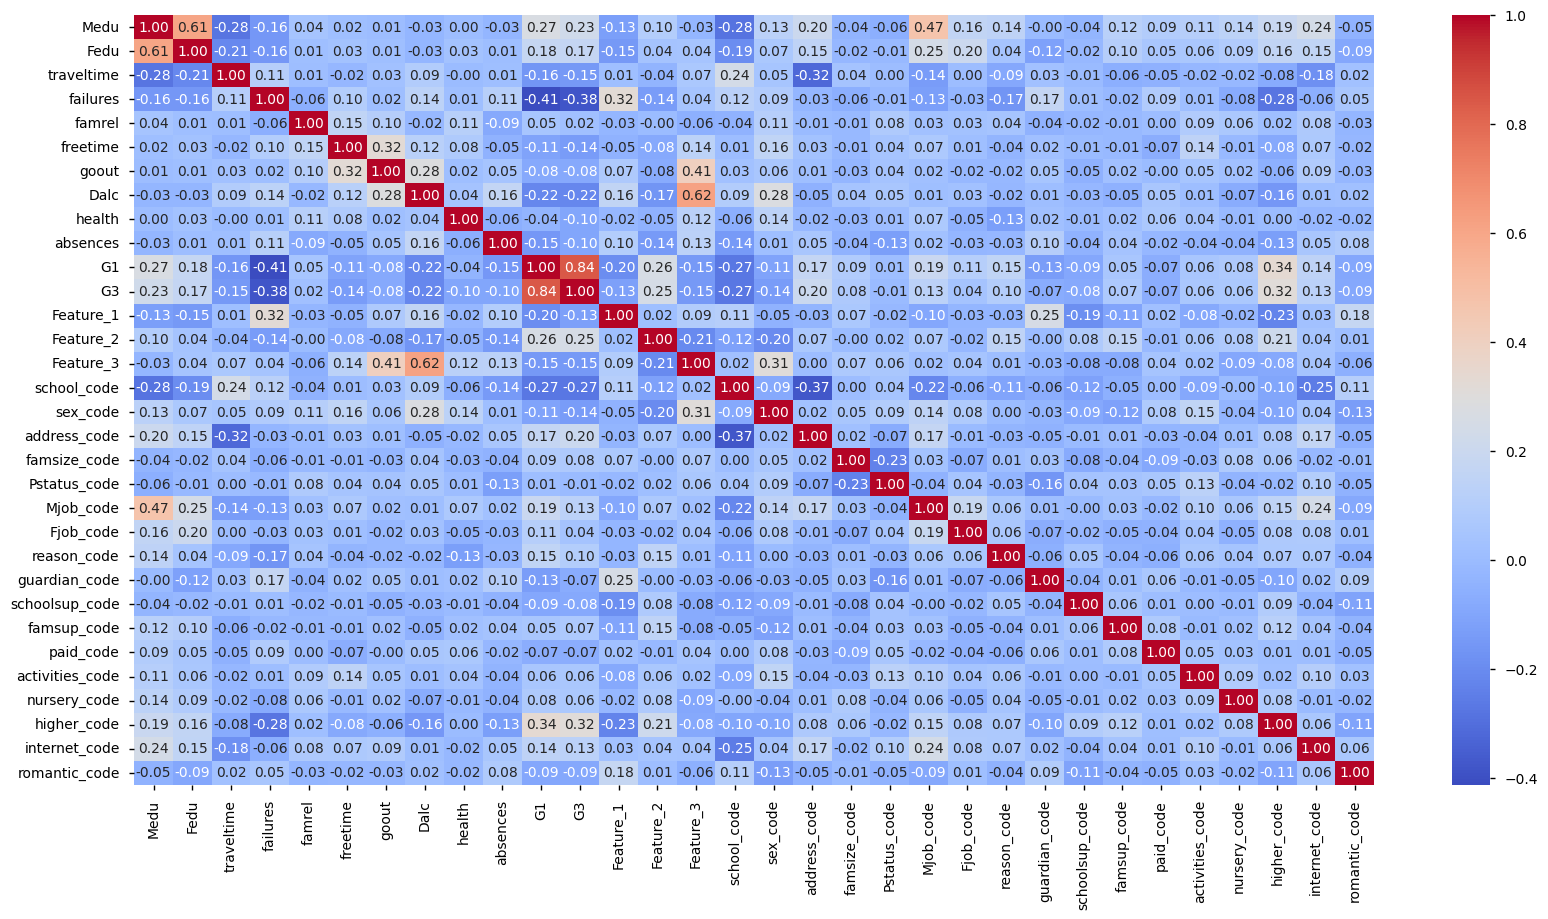

In [7]:
# Now that we have encoded categorical fields , we can plot a correlation matrix 

corr_matrix = student_data.corr(numeric_only = True)

plt.style.use("seaborn-v0_8-notebook")
plt.figure(figsize=(20, 10)) 
sns.heatmap(corr_matrix,annot = True , cmap = "coolwarm",fmt=".2f");

#### Now our task is to guess what the unknown features might represent:

From the correlation matrix we observe that :
1) Feature_3 might represent frequency of off-campus visits because high correlation with goout and Dalc etc.
2) Feature_1 has a slight positive correlation with failures


Lets use more EDA tools to identify dependencies on other features

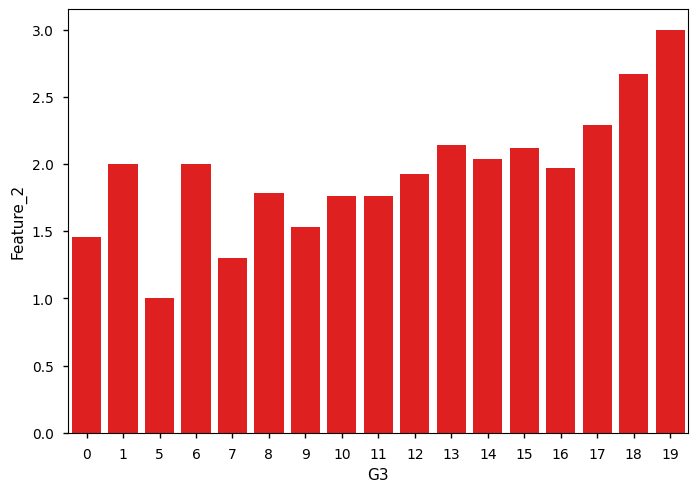

In [8]:
sns.barplot(data = student_data ,x="G3",y="Feature_2",color = "Red",errorbar = None);

#### This shows us that Feature_2 has a positive impact on grades if grades are above a certain threshold

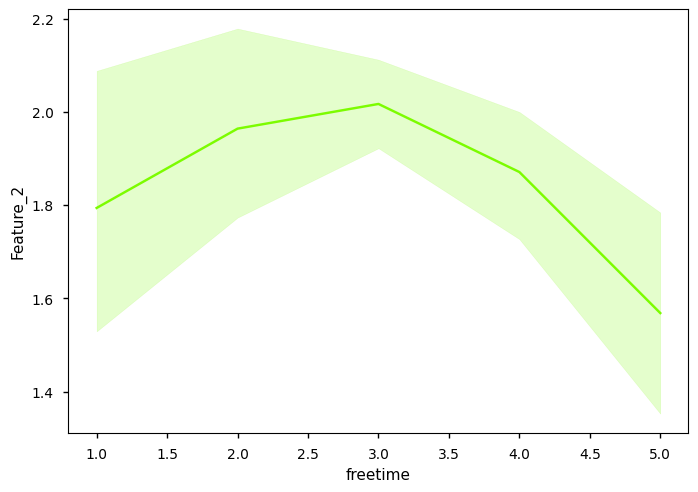

In [9]:
sns.lineplot(data = student_data ,x="freetime",y="Feature_2",color = "Lawngreen");

#### Feature_2 decreases by a significant amount if free time is very high. But there is a certain threshold to this aound 3.0

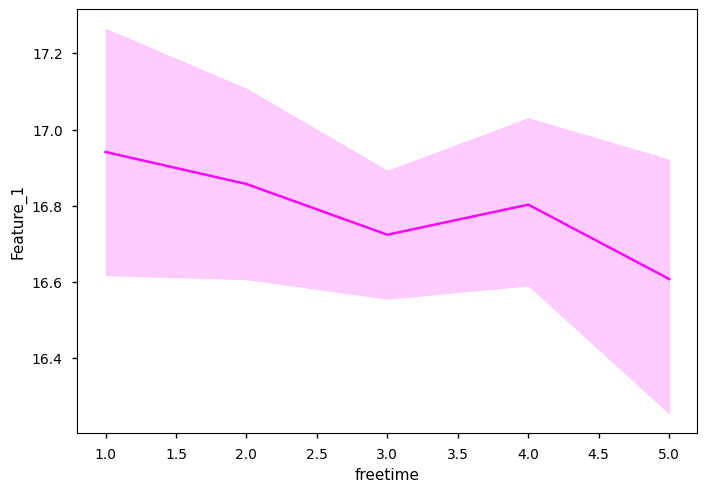

In [10]:
sns.lineplot(data = student_data ,x="freetime",y="Feature_1",color = "Magenta");

#### Feature_1 clearly decreases as free time increases

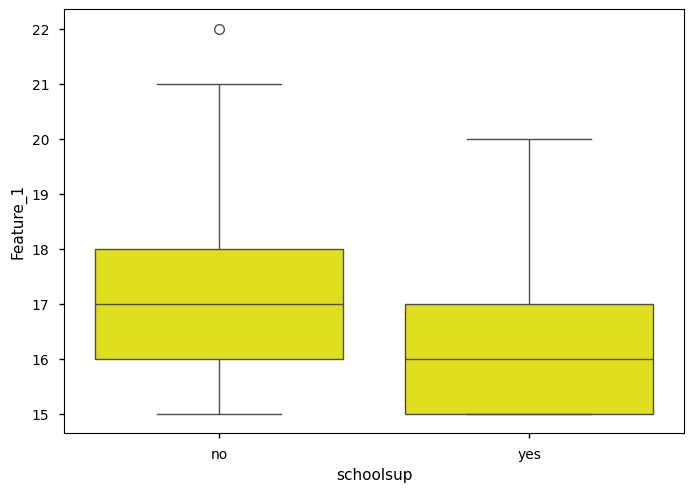

In [11]:
sns.boxplot(data = student_data ,x="schoolsup",y="Feature_1",color = "Yellow");

#### The students who do not need school support have a higher Feature_1 attribute

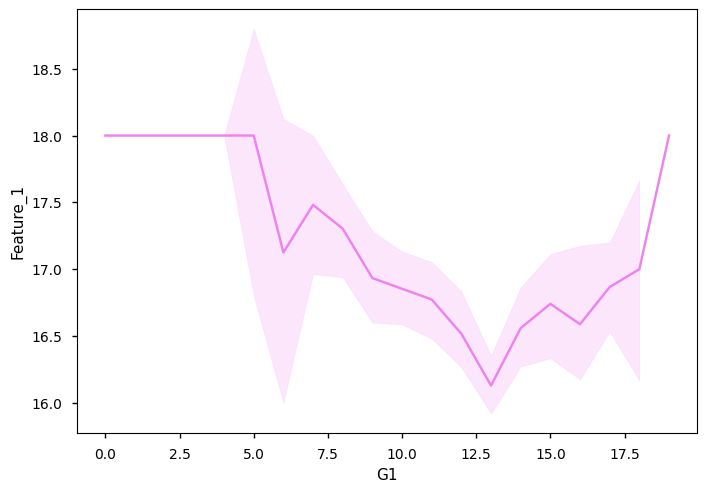

In [12]:
sns.lineplot(data = student_data ,x="G1",y="Feature_1",color = "violet");

#### This graph tells us that generally if grades are less the Feature_1 attribute is more although as grades increase after a certain threshold of 12.5 , Feature_1 increases


-------------------------------------------------------------------------
## So from the above plots we draw the following information :

### <u> Feature_1 <u> :
1) Feature_1 varies inversely with schoolsup
2) If grades are less then Feature_1 is quite high.
3) Feature_1 decreases with free time

### From this we can guess that Feature_1 is somehow related to  <u> **Academic Stress** <u>

### <u> Feature_2 <u> :
1)  Feature_2 has +ve impact on grades if grades are above a certain threshold
2)  Feature_2 decreases by a significant amount if freetime is very high

### From this we can guess that Feature_2 is somehow related to <u> "Attendance" <u>

### <u> Feature_3 <u> :
1) From the correlation matrix we observe that Feature_3 is positively correlated with freetime and Dalc

### From this we can guess that Feature_3 is somehow related to <u> "Off-campus visits" <u>
    
<br>

-------------------------------------------------------------------------




<br> 

# <u> Level 3 </u> :-
### Now our next task is to perform EDA on the dataset

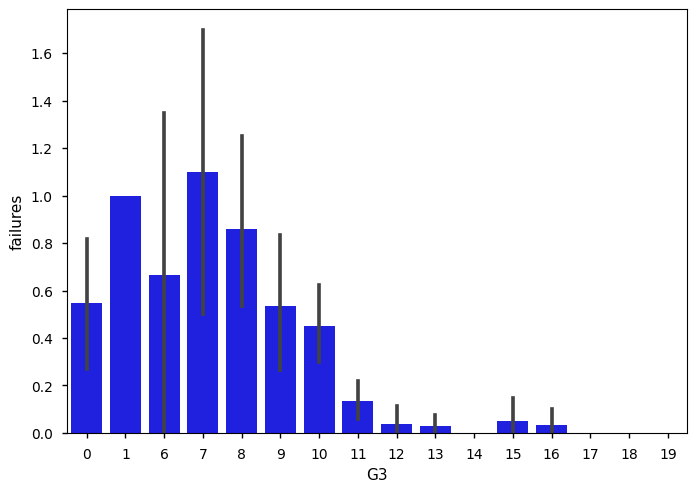

In [13]:
# How are failures and grades correlated?
sns.barplot(data = student_data[student_data["G3"]!=5] ,x="G3",y="failures",color = "blue");

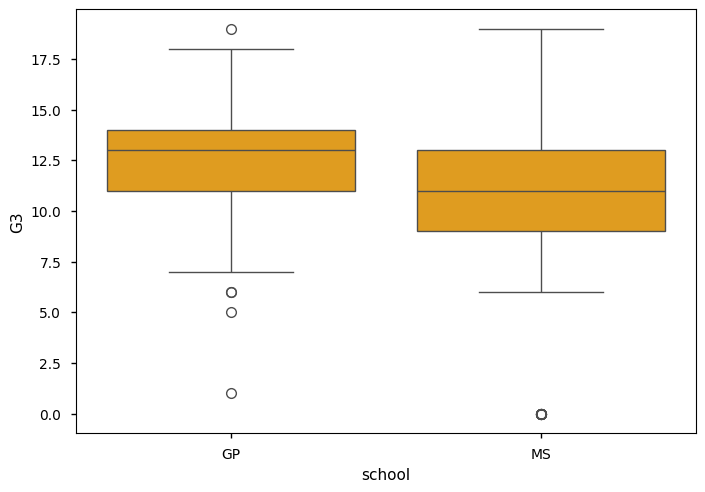

In [14]:
# Students of which school have better grades? This gives an insight into quality of education in both schools
sns.boxplot(data = student_data, x="school",y = "G3",color = "orange");


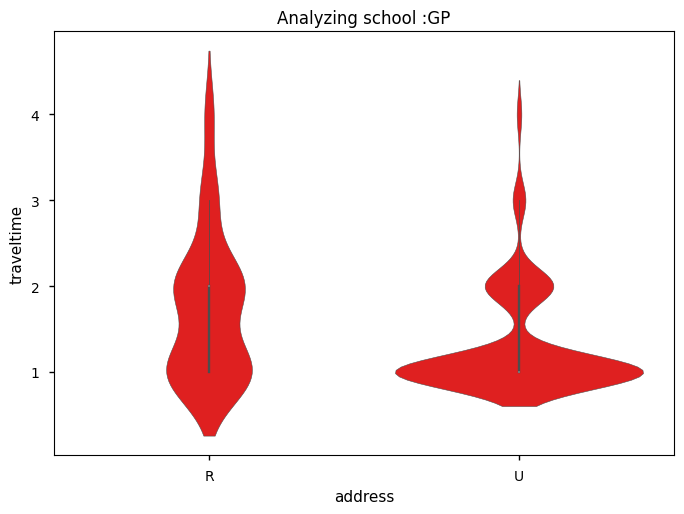

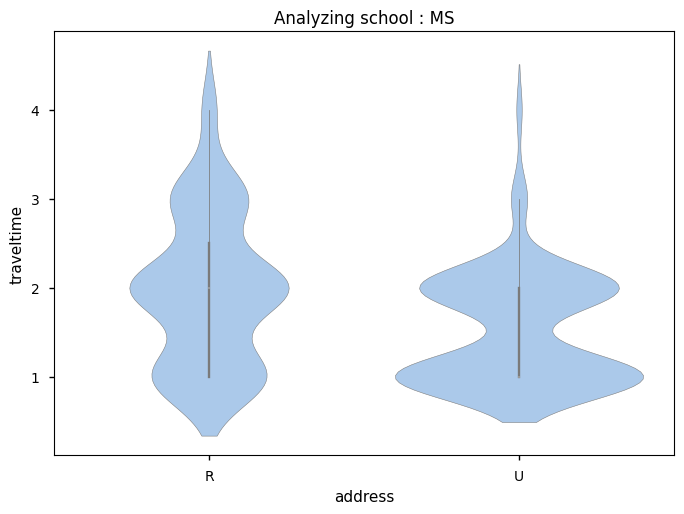

In [15]:
# How is travel time related to location of resdience of students? This gives us an idea of whether the school is located in a rural area or urban area
#Conclusion is that both schools are located in an urban area
sns.violinplot(data = student_data[student_data["school_code"] == 0], x="address" , y = "traveltime",color = "red")
plt.title("Analyzing school :GP")
plt.show()
plt.title("Analyzing school : MS")
sns.violinplot(data = student_data[student_data["school_code"] == 1], x="address" , y = "traveltime",color = "#a1c9f4");

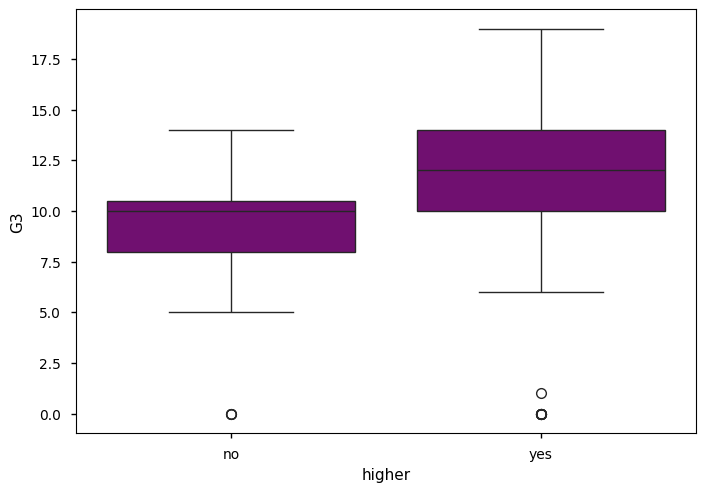

In [16]:
#Is there a correlation between grades and the interest in pursuing higher studies?
sns.boxplot(data = student_data, x="higher",y = "G3",color = "purple");

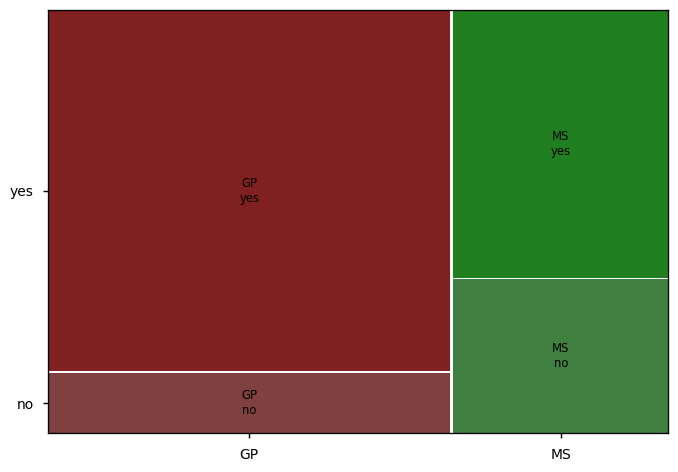

In [17]:
#Internet vs school.. the data being represented by a mosaic plot
mosaic(student_data,["school","internet"]);

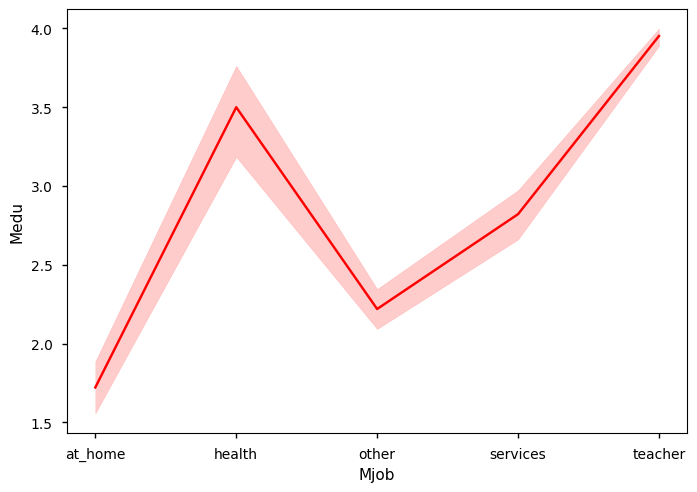

In [18]:
#Mjob vs Medu
sns.lineplot(data = student_data, x="Mjob",y = "Medu",color = "red");

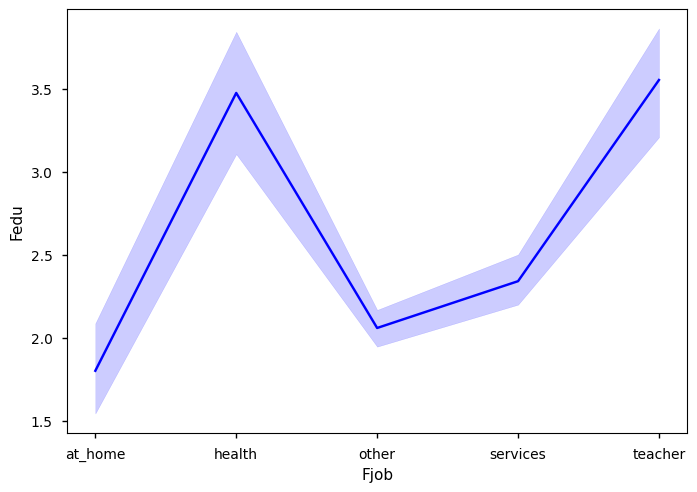

In [19]:
#Fjob vs Fedu
sns.lineplot(data = student_data, x="Fjob",y = "Fedu",color = "blue");

# <u>LEVEL 4 </u> :-
## Now, using Machine Learning models to make predictions:


After going through various trial and errors the main steps are as follows:

#### 1) Preparing the data
#### 2) SelectKbest  -- Feature Selection
#### 3) Feature Scaling
#### 4) Train,Test split
#### 5) Models:
  &emsp; 1) Logistic Regression -- sklearn.linear_model.LogisticRegression()
  <br>
 &emsp; 2) Decision Tree -- sklearn.tree.DecisionTreeClassifier()
 <br>
  &emsp; 3) KNeighborsClassifier -- sklearn.neighbors.KNeighborsClassifier()
   <br>
  &emsp; 4) RandomForest -- sklearn.ensemble.RandomForestClassifier()
   <br>
  &emsp; 5) XGBoost -- xgboost
  <br>
  &emsp; 6) NaiveBayes -- GaussianNB() -- note : already done Feature_scaling so didnt use CategoricalNB  -- sklearn.naive_bayes.GaussianNB()
<br>
#### 6) Using GridSearchCV on RandomForestClassifier 
#### 7) Analyzing accuracy, viewing decision boundary
#### 8) SHAP Analysis

In [20]:
# STEP 1 : PREPARING THE DATA

X = student_data.drop(["romantic_code"],axis=1)
y = student_data["romantic_code"]
numeric_X = X.select_dtypes(include = "number")

In [21]:
# STEP 2 : FEATURE SELECTION

# SelectKBest is a method from sklearn.feature_selection which uses different stastical methods to select the k best 
# features for performing analysis. For categorical data there is mainly one method call chi2 (chi squared) , 
# A higher chi2 score for a particular feature represents a strong association between that feature and target field


selector = SelectKBest( k=8) #k = 10 is working really great
numeric_Xarr = selector.fit_transform(numeric_X,y)
selected_features = numeric_X.columns[selector.get_support()]
print("Selected features:", selected_features.tolist())

Selected features: ['Fedu', 'G1', 'Feature_1', 'school_code', 'sex_code', 'guardian_code', 'schoolsup_code', 'higher_code']


In [22]:
# STEP 3: FEATURE SCALING 

#There are mainly two methods in feature scaling -- 1) Z-score 2) Min-max
# 1) Z-score method -- it normalizes the distribution by replacing data points with its corresponding z score (xi-mean)/variance
# This converts the data to a distribution with mean = 0 and variance = 1. It is implemented by sklearn.preprocessing.StandardScaler()
# 2) Min-max method -- it scales all the data points to the given interval [min,max]. It is implemented by sklearn.preprocessing.MinMaxScaler()

scaler = StandardScaler()
numeric_Xarr = scaler.fit_transform(numeric_Xarr)

In [23]:
# STEP 4 : TRAIN , TEST SPLIT:
# There are two methods to do this. Since our dataset contains <1k samples we can use crossvalidation or just use some rule
# like 70/30 , 80/20 , 75/25 to split our data into train and test.

# Here in every cell i am using both the methods to find accuracy

X_train, X_test, y_train, y_test = train_test_split(numeric_Xarr, y, test_size=0.2,random_state =69) #randomstate = 69 works reall great



### MODELS:

In [24]:
modelLR = LogisticRegression()
modelDT = DecisionTreeClassifier()
modelKNN = KNeighborsClassifier(n_neighbors=7)
modelRF = RandomForestClassifier()
modelXGB = xgb.XGBClassifier()
modelBayes = GaussianNB()

Cross-validation scores: [0.64179104 0.64179104 0.67164179 0.62686567 0.62686567 0.71212121
 0.68181818 0.5       ]
Mean accuracy: 0.6378618272274988

Accuracy of Logistic Regression : 0.6822429906542056
Confusion Matrix:
 [[66 11]
 [23  7]]



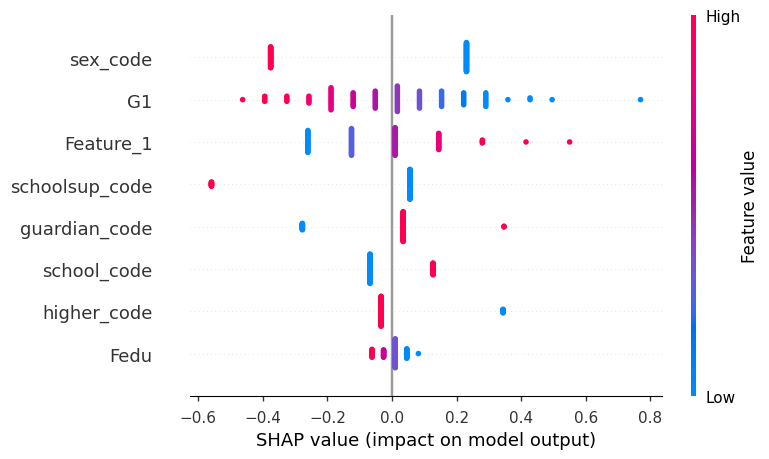

In [39]:
# 1) lOGISTIC REGRESSION:


#METHOD 1 : CV
scores = cross_val_score(modelLR, numeric_Xarr, y, cv=8, scoring='accuracy')
print("Cross-validation scores:", scores)
print("Mean accuracy:", np.mean(scores))

print()

#METHOD 2: TRAIN TEST SPLIT
modelLR.fit(X_train, y_train)
y_predLR = modelLR.predict(X_test)
print("Accuracy of Logistic Regression :", accuracy_score(y_test, y_predLR))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_predLR))

print()

#USING SHAP TO ANALYZE :-
explainer = shap.Explainer(modelLR,X_train)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values,X_test,feature_names =selected_features)

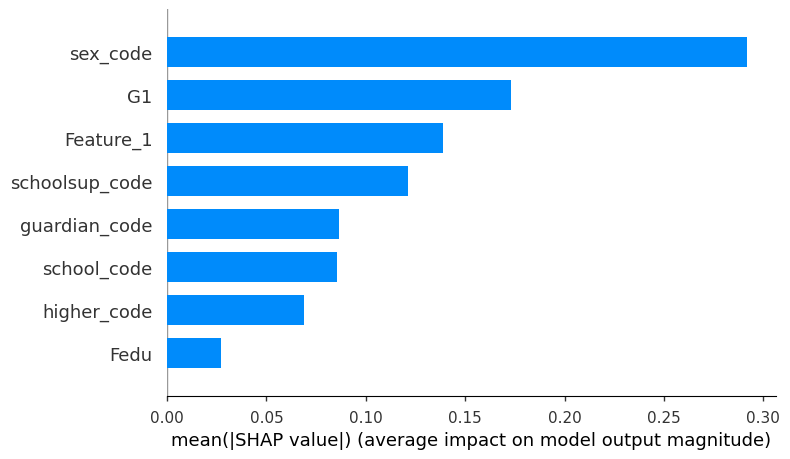

In [38]:
shap.summary_plot(shap_values,X_test,feature_names =selected_features,plot_type="bar")

In [43]:
# 2) DECISION TREES:

#METHOD 1 : CV
scores = cross_val_score(modelDT, numeric_Xarr, y, cv=8, scoring='accuracy')
print("Cross-validation scores:", scores)
print("Mean accuracy:", np.mean(scores))



print()

#METHOD 2: TRAIN TEST SPLIT
modelDT.fit(X_train, y_train)
y_predDT = modelDT.predict(X_test)
print("Accuracy of Decision Tree:", accuracy_score(y_test, y_predDT))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_predDT))



#Couldnt implement this properly!
# explainer = shap.TreeExplainer(modelDT,X_train)
# shap_values = explainer.shap_values(X_test)
# shap.summary_plot(shap_values,X_test,feature_names =selected_features,plot_type = "bar");

Cross-validation scores: [0.59701493 0.6119403  0.59701493 0.58208955 0.64179104 0.48484848
 0.46969697 0.43939394]
Mean accuracy: 0.5529737675260062

Accuracy of Decision Tree: 0.5887850467289719
Confusion Matrix:
 [[54 23]
 [21  9]]


In [28]:
# 3) KNeighborsClassifier:

#METHOD 1 : CV
scores = cross_val_score(modelKNN, numeric_Xarr, y, cv=8, scoring='accuracy')
print("Cross-validation scores:", scores)
print("Mean accuracy:", np.mean(scores))

print()

#METHOD 2: TRAIN TEST SPLIT
modelKNN.fit(X_train, y_train)
y_pred = modelKNN.predict(X_test)
print("Accuracy of KNN :", accuracy_score(y_test, y_pred))

Cross-validation scores: [0.58208955 0.65671642 0.6119403  0.55223881 0.6119403  0.63636364
 0.66666667 0.48484848]
Mean accuracy: 0.6003505201266395

Accuracy of KNN : 0.6635514018691588


In [29]:
# 4)RandomForestClassifier:

#METHOD 1 : CV
scores = cross_val_score(modelRF, numeric_Xarr, y, cv=8, scoring='accuracy')
print("Cross-validation scores:", scores)
print("Mean accuracy:", np.mean(scores))

print()


#METHOD 2: TRAIN TEST SPLIT
modelRF.fit(X_train,y_train)
y_pred=modelRF.predict(X_test)
print("Accuracy of RandomForest :", accuracy_score(y_test, y_pred))

Cross-validation scores: [0.64179104 0.65671642 0.56716418 0.6119403  0.6119403  0.57575758
 0.63636364 0.46969697]
Mean accuracy: 0.596421302578019

Accuracy of RandomForest : 0.7102803738317757


In [30]:
# 5) XGBoost

#METHOD 1 : CV
scores = cross_val_score(modelXGB, numeric_Xarr, y, cv=8, scoring='accuracy')
print("Cross-validation scores:", scores)
print("Mean accuracy:", np.mean(scores))

print()

#METHOD 2: TRAIN TEST SPLIT
modelXGB.fit(X_train,y_train)
print("Accuracy of XGB", modelXGB.score(X_test, y_test))

Cross-validation scores: [0.62686567 0.59701493 0.55223881 0.58208955 0.62686567 0.53030303
 0.56060606 0.51515152]
Mean accuracy: 0.5738919041157847

Accuracy of XGB 0.6635514018691588


In [31]:
# 6) Naive Bayes (GaussianNB)

#METHOD 1 : CV
scores = cross_val_score(modelBayes, numeric_Xarr, y, cv=8, scoring='accuracy')
print("Cross-validation scores:", scores)
print("Mean accuracy:", np.mean(scores))

print()

#METHOD 2: TRAIN TEST SPLIT
modelBayes.fit(X_train, y_train)
print("Accuracy of Naive Bayes", modelBayes.score(X_test, y_test))


Cross-validation scores: [0.64179104 0.71641791 0.65671642 0.56716418 0.64179104 0.8030303
 0.62121212 0.40909091]
Mean accuracy: 0.6321517412935322

Accuracy of Naive Bayes 0.7009345794392523


In [32]:
# STEP 6 : GRIDSEARCHCV

#print(modelRF.get_params())

# After viewing the hyperparameters and playing around with their possible values I constructed a parameter grid
# Then using gridsearchCV to find the optimal combination of hyperparamters

paramRF = {
    "n_estimators" : [25,30,40], # number of decision trees
    "criterion" : ["gini","entropy","log_loss"], #loss function
     "min_samples_split" : [0.01,0.05,0.08], #min samples (proportion) required to split a node
     "min_samples_leaf" : [2,5,10] , # min samples required in a leaf ( too less = overfit)
     "max_depth" : [50,80] # max depth of a decision tree
}

grid = GridSearchCV(estimator = modelRF , param_grid = paramRF,cv = 6)
grid.fit(X_train,y_train)
print("Best parameters:", grid.best_params_)
print("Accuracy using GridSearchCV:", grid.score(X_test,y_test))


KeyboardInterrupt: 

Selected features: ['Feature_1', 'sex_code']
Best parameters: {'criterion': 'gini', 'max_depth': 50, 'min_samples_leaf': 10, 'min_samples_split': 0.05, 'n_estimators': 40}
Accuracy using GridSearchCV:  71.02803738317756


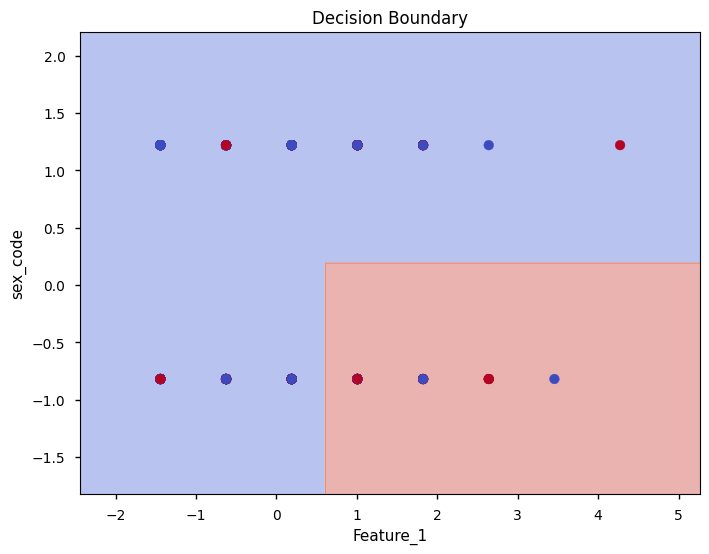

In [33]:
# STEP 7: VIEWING DECISION BOUNDARY

# For viewing the decision boundary we need only two features so I re-applied the entire above procedure with k=2 in SelectKbest

X = student_data.drop(["romantic_code"],axis=1)
y = student_data["romantic_code"]
numeric_X = X.select_dtypes(include = "number")


selector = SelectKBest( k=2) 
numeric_Xarr = selector.fit_transform(numeric_X,y)
selected_features = numeric_X.columns[selector.get_support()]
print("Selected features:", selected_features.tolist())

scaler = StandardScaler()
numeric_Xarr = scaler.fit_transform(numeric_Xarr)
X_train, X_test, y_train, y_test = train_test_split(numeric_Xarr, y, test_size=0.2,random_state =69)
modelRF = RandomForestClassifier()
modelRF.fit(X_train,y_train)


paramRF = {
    "n_estimators" : [25,30,40], # number of decision trees
    "criterion" : ["gini","entropy","log_loss"], #loss function
     "min_samples_split" : [0.01,0.05,0.08], #min samples (prop) required to split a node
     "min_samples_leaf" : [2,5,10] , # min samples required in a leaf ( too less = overfit)
     "max_depth" : [50,80] # max depth of a decision tree
}

grid = GridSearchCV(estimator = modelRF , param_grid = paramRF,cv = 6)
grid.fit(X_train,y_train)
print("Best parameters:", grid.best_params_)
print("Accuracy using GridSearchCV: ", 100*grid.score(X_test,y_test))


#---------------------------------------------------------------------------------
def plot_decision_boundary(X, y, model, title,selectedFeatures):
    h = 0.01  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel(selectedFeatures[0])
    plt.ylabel(selectedFeatures[1])
    plt.title(title)
    plt.show()
#-----------------------------------------------------------------------------------------------------------
plot_decision_boundary(X_train, y_train, grid.best_estimator_, "Decision Boundary",selected_features)

### Plotting decision boundaries corresponding to each model :-

Cross-validation scores: [0.62686567 0.64179104 0.65671642 0.62686567 0.56716418 0.6969697
 0.63636364 0.63636364]
Mean accuracy: 0.6361374943464496

Accuracy of Logistic Regression : 0.719626168224299
Confusion Matrix:
 [[75  2]
 [28  2]]


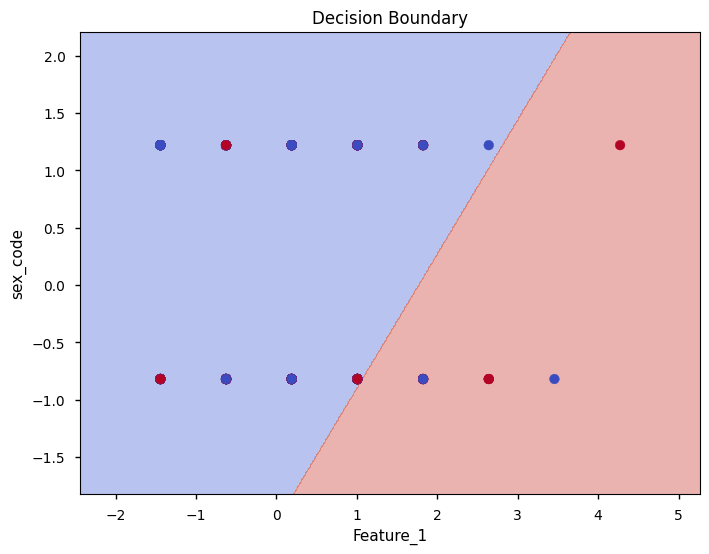

In [34]:
#1) Linear Regression:-

#METHOD 1 : CV
scores = cross_val_score(modelLR, numeric_Xarr, y, cv=8, scoring='accuracy')
print("Cross-validation scores:", scores)
print("Mean accuracy:", np.mean(scores))

print()

#METHOD 2: TRAIN TEST SPLIT
modelLR.fit(X_train, y_train)
y_predLR = modelLR.predict(X_test)
print("Accuracy of Logistic Regression :", accuracy_score(y_test, y_predLR))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_predLR))
plot_decision_boundary(X_train, y_train, modelLR, "Decision Boundary",selected_features)

Cross-validation scores: [0.62686567 0.64179104 0.67164179 0.64179104 0.55223881 0.62121212
 0.62121212 0.59090909]
Mean accuracy: 0.620957711442786

Accuracy of Decision Tree: 0.7102803738317757
Confusion Matrix:
 [[70  7]
 [24  6]]


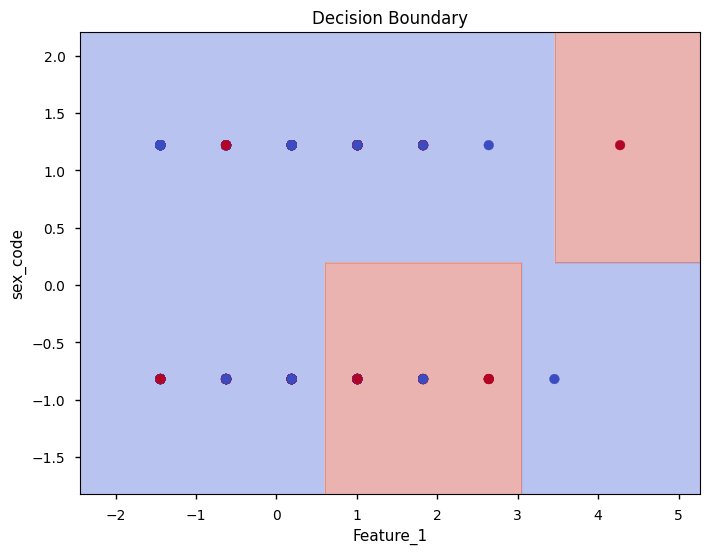

In [35]:
# 2) Decision tree

#METHOD 1 : CV
scores = cross_val_score(modelDT, numeric_Xarr, y, cv=8, scoring='accuracy')
print("Cross-validation scores:", scores)
print("Mean accuracy:", np.mean(scores))

print()

#METHOD 2: TRAIN TEST SPLIT
modelDT.fit(X_train, y_train)
y_predDT = modelDT.predict(X_test)
print("Accuracy of Decision Tree:", accuracy_score(y_test, y_predDT))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_predDT))
plot_decision_boundary(X_train, y_train, modelDT, "Decision Boundary",selected_features)

In [ ]:
# 3) KNeighborsClassifier:

#METHOD 1 : CV
scores = cross_val_score(modelKNN, numeric_Xarr, y, cv=8, scoring='accuracy')
print("Cross-validation scores:", scores)
print("Mean accuracy:", np.mean(scores))

print()

#METHOD 2: TRAIN TEST SPLIT
modelKNN.fit(X_train, y_train)
y_pred = modelKNN.predict(X_test)
print("Accuracy of KNN :", accuracy_score(y_test, y_pred))
plot_decision_boundary(X_train, y_train, modelKNN, "Decision Boundary",selected_features)

Cross-validation scores: [0.6119403  0.65671642 0.6119403  0.74626866 0.55223881 0.62121212
 0.62121212 0.62121212]
Mean accuracy: 0.6303426051560379

Accuracy of KNN : 0.6822429906542056


In [ ]:
# 4)RandomForestClassifier:

#METHOD 1 : CV
scores = cross_val_score(modelRF, numeric_Xarr, y, cv=8, scoring='accuracy')
print("Cross-validation scores:", scores)
print("Mean accuracy:", np.mean(scores))

print()

#METHOD 2: TRAIN TEST SPLIT
modelRF.fit(X_train,y_train)
y_pred=modelRF.predict(X_test)
print("Accuracy of RandomForest :", accuracy_score(y_test, y_pred))
plot_decision_boundary(X_train, y_train, modelRF, "Decision Boundary",selected_features)

In [ ]:
# 5) XGBoost

#METHOD 1 : CV
scores = cross_val_score(modelXGB, numeric_Xarr, y, cv=8, scoring='accuracy')
print("Cross-validation scores:", scores)
print("Mean accuracy:", np.mean(scores))

print()

#METHOD 2: TRAIN TEST SPLIT
modelXGB.fit(X_train,y_train)
print("Accuracy of XGB", modelXGB.score(X_test, y_test))
plot_decision_boundary(X_train, y_train, modelXGB, "Decision Boundary",selected_features)

In [ ]:
# 6) Naive Bayes (GaussianNB)

#METHOD 1 : CV
scores = cross_val_score(modelBayes, numeric_Xarr, y, cv=8, scoring='accuracy')
print("Cross-validation scores:", scores)
print("Mean accuracy:", np.mean(scores))

print()

#METHOD 2: TRAIN TEST SPLIT
modelBayes.fit(X_train, y_train)
print("Accuracy of Naive Bayes", modelBayes.score(X_test, y_test))
plot_decision_boundary(X_train, y_train, modelBayes, "Decision Boundary",selected_features)

# <u> LEVEL 5 </u> :-

### Note -- I have already performed SHAP analysis on logistic regression for the best k features above. Please check
### Performing SHAP analysis on models:

Accuracy of Logistic Regression : 0.719626168224299


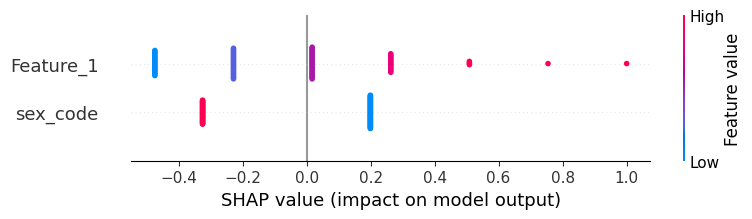

In [63]:
#1) Logistic Regression

modelLR.fit(X_train, y_train)
y_predLR = modelLR.predict(X_test)
print("Accuracy of Logistic Regression :", accuracy_score(y_test, y_predLR))
explainer = shap.Explainer(modelLR,X_train)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values,X_test,feature_names =selected_features)


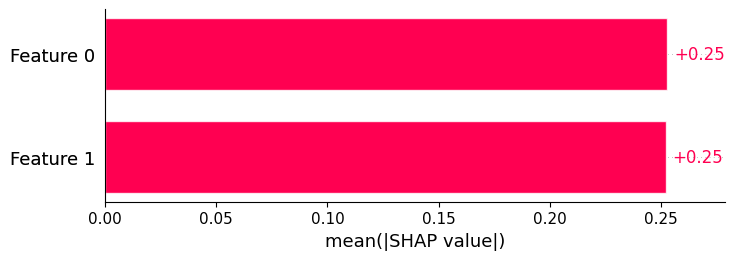

In [62]:
explanation = explainer(X_test)
shap.plots.bar(explanation)

In [ ]:
# svc = SVC(kernel='rbf', C=1.0, gamma='scale', probability=True)
# svc.fit(X_train, y_train)

# # Predict
# y_pred = svc.predict(X_test)

# # Evaluate
# print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Accuracy: {accuracy

In [1]:
#2) Naive Bayes

modelBayes.fit(X_train, y_train)
y_predLR = modelBayes.predict(X_test)
print("Accuracy of Logistic Regression :", accuracy_score(y_test, y_predLR))
explainer = shap.Explainer(modelBayes,X_train)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values,X_test,feature_names =selected_features)

NameError: name 'modelBayes' is not defined